In [1]:
%load_ext autoreload
%autoreload 2
from __future__ import division, print_function, absolute_import
import pickle
import os
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
from ANEMO import read_edf
import numpy as np
from lmfit import  Model, Parameters
from cycler import cycler
import glob
%matplotlib inline

In [2]:
t_titre = 35
t_label = 25

In [3]:
!ls ../data/

enregistrement_AM_2017-10-23_100057.asc
enregistrement_AM_2017-10-23_100057.edf
enregistrement_AM_2017-10-23_100057.pkl
enregistrement_BMC_2017-09-26_095637.asc
enregistrement_BMC_2017-09-26_095637.EDF
enregistrement_BMC_2017-09-26_095637.pkl
enregistrement_CS_2017-10-03_134421.asc
enregistrement_CS_2017-10-03_134421.edf
enregistrement_CS_2017-10-03_134421.pkl
enregistrement_DC_2017-09-27_161040.asc
enregistrement_DC_2017-09-27_161040.edf
enregistrement_DC_2017-09-27_161040.pkl
enregistrement_FM_2017-10-03_143803.asc
enregistrement_FM_2017-10-03_143803.EDF
enregistrement_FM_2017-10-03_143803.pkl
enregistrement_IP_2017-09-28_115250.asc
enregistrement_IP_2017-09-28_115250.edf
enregistrement_IP_2017-09-28_115250.pkl
enregistrement_LB_2017-09-20_151043 (1).asc
enregistrement_LB_2017-09-20_151043.asc
enregistrement_LB_2017-09-20_151043.edf
enregistrement_LB_2017-09-20_151043.pkl
enregistrement_OP_2017-10-26_121823.asc
enregistrement_OP_2017-10-26_121823.edf
enregistrement_OP_2017-10-26_1218

In [4]:
timeStr = '2017-09-20_151043'
observer = 'LB'
mode = 'enregistrement'

In [5]:
file = os.path.join('..', 'data', mode + '_' + observer + '_' + timeStr + '.pkl')
with open(file, 'rb') as fichier :
    exp = pickle.load(fichier, encoding='latin1')
      
resultats = os.path.join('..', 'data', mode + '_' + observer + '_' + timeStr + '.asc')
data = read_edf(resultats, 'TRIALID')

In [6]:
N_trials = exp['N_trials']
N_blocks = exp['N_blocks']
screen_width_px = exp['screen_width_px']
screen_height_px = exp['screen_height_px']
V_X = exp['V_X']
RashBass = exp['RashBass']
stim_tau = exp['stim_tau']
p = exp['p']

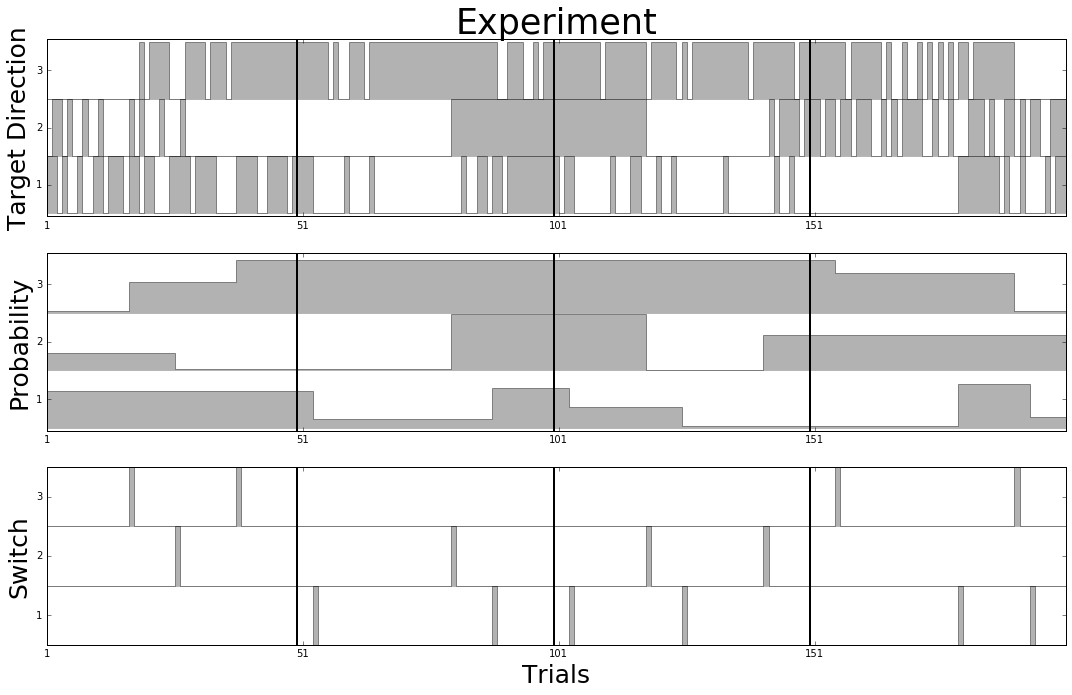

In [7]:
fig_width = 15
fig, axs = plt.subplots(3, 1, figsize=(fig_width, fig_width/(1.6180)))


stick = np.zeros_like(p)
stick[:, :, 0] = np.ones((N_trials, 1)) * np.arange(N_blocks)[np.newaxis, :]
stick[:, :, 1] = np.ones((N_trials, 1)) * np.arange(N_blocks)[np.newaxis, :]
stick[:, :, 2] = np.ones((N_trials, 1)) * np.arange(N_blocks)[np.newaxis, :]

for i_layer, label in enumerate(['Target Direction', 'Probability', 'Switch']):#([r'$\^x_0$', r'$\^p$', r'$\^x_2$']):
    #axs[i_layer].set_prop_cycle(cycler('color', [plt.cm.magma(h) for h in np.linspace(0, 1, N_blocks+1)]))
    axs[i_layer].step(range(N_trials), p[:, :, i_layer]+stick[:, :, i_layer], lw=1, c='k', alpha=.3)
    for i_block in range(N_blocks):
        _ = axs[i_layer].fill_between(range(N_trials), i_block + np.zeros_like(p[:, i_block, i_layer]), i_block + p[:, i_block, i_layer], lw=.5, alpha=.3, facecolor='black', step='pre')
        #_ = axs[i_layer].fill_between(range(N_trials), i_block + np.ones_like(p[:, i_block, i_layer]), i_block + p[:, i_block, i_layer], lw=.5, alpha=.1, facecolor='red', step='pre')
    axs[i_layer].axis('tight')
    axs[i_layer].set_yticks(np.arange(N_blocks)+.5)
    axs[i_layer].set_yticklabels(np.arange(N_blocks)+1 )
    
    axs[i_layer].set_xticklabels([1, 51, 101, 151])
    axs[i_layer].set_ylabel(label, fontsize=t_label)
    axs[i_layer].bar(49, 3.1, bottom=-0.05, color='k', width=0, linewidth=2)
    axs[i_layer].bar(99, 3.1, bottom=-0.05, color='k', width=0, linewidth=2)
    axs[i_layer].bar(149, 3.1, bottom=-0.05, color='k', width=0, linewidth=2)

fig.tight_layout()
for i in range(2): axs[i].set_ylim(-.05, N_blocks + .05)
axs[-1].set_xlabel('Trials', fontsize=t_label)
axs[0].set_title('Experiment', fontsize=t_titre)

plt.show()

In [8]:
liste = []
for fname in glob.glob('data/*pkl'):
    a = fname.split('/')[1].split('.')[0].split('_')
    liste.append(a)
    print(a)

['pari', 'TN', '2017-11-08', '155132']
['pari', 'SR', '2017-11-14', '102614']
['enregistrement', 'AM', '2017-10-23', '100057']
['enregistrement', 'CS', '2017-10-03', '134421']
['enregistrement', 'RS', '2017-11-08', '094717']
['pari', 'FM', '2017-09-26', '143606']
['pari', 'LB', '2017-09-19', '152205']
['enregistrement', 'LB', '2017-09-20', '151043']
['pari', 'YK', '2017-11-06', '164857']
['pari', 'DC', '2017-09-26', '162348']
['pari', 'IP', '2017-09-26', '122431']
['enregistrement', 'SR', '2017-11-16', '153313']
['enregistrement', 'OP', '2017-10-26', '121823']
['pari', 'AM', '2017-09-29', '123528']
['pari', 'BMC', '2017-09-25', '142503']
['pari', 'OP', '2017-10-24', '105728']
['enregistrement', 'IP', '2017-09-28', '115250']
['enregistrement', 'TN', '2017-11-08', '150410']
['enregistrement', 'BMC', '2017-09-26', '095637']
['pari', 'CS', '2017-09-28', '154353']
['enregistrement', 'DC', '2017-09-27', '161040']
['enregistrement', 'FM', '2017-10-03', '143803']
['pari', 'RS', '2017-11-07', '

In [9]:
EXP = []
for x in range(len(liste)) :
    if liste[x][0]=='pari' and liste[x][1] in ['AM','BMC','CS','DC','FM','IP','LB'] :
        a = 'data/%s_%s_%s_%s.pkl'%(liste[x][0], liste[x][1],liste[x][2],liste[x][3])
        with open(a, 'rb') as fichier :
            b = pickle.load(fichier, encoding='latin1')
            EXP.append(b)
PARAM = []
for x in range(len(liste)) :
    if liste[x][0]=='pari' and liste[x][1] in ['AM','BMC','CS','DC','FM','IP','LB'] :
        a = 'parametre/param_Fit_%s.pkl'%(liste[x][1])
        with open(a, 'rb') as fichier :
            b = pickle.load(fichier, encoding='latin1')
            PARAM.append(b)

In [10]:
print(PARAM[3]['observer'])

IP


LB = k
IP = darkred
CS = darkred


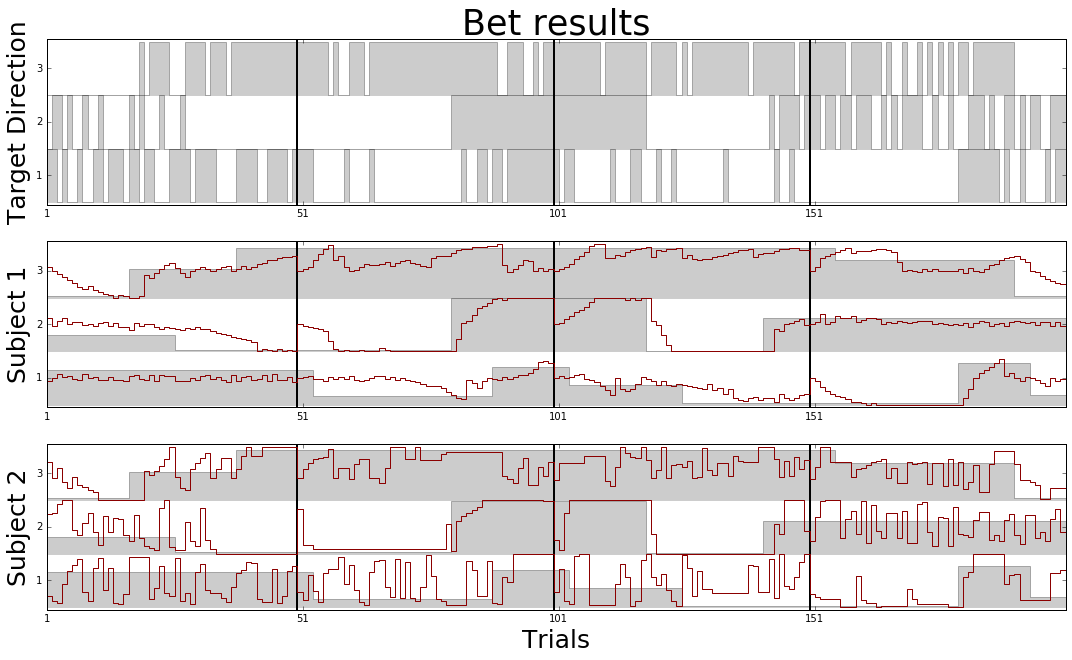

In [11]:
fig_width = 15
fig, axs = plt.subplots(3, 1, figsize=(fig_width, fig_width/(1.6180)))
        
liste=[1, 3, 6]
#color = ['k', 'red','darkred']
color = ['k', 'darkred','darkred']
a = 0
for x in liste :
    print(EXP[x]['observer'], '=', color[a])
    N_trials = EXP[x]['N_trials']
    N_blocks = EXP[x]['N_blocks']
    p = EXP[x]['p']
    results = (EXP[x]['results']+1)/2 # results est sur [-1,1] on le ramene sur [0,1]

    stick = np.zeros_like(p)
    stick[:, :, 0] = np.ones((N_trials, 1)) * np.arange(N_blocks)[np.newaxis, :]
    stick[:, :, 1] = np.ones((N_trials, 1)) * np.arange(N_blocks)[np.newaxis, :]
    stick[:, :, 2] = np.ones((N_trials, 1)) * np.arange(N_blocks)[np.newaxis, :]

    axs[a].set_prop_cycle(cycler('color', [plt.cm.magma(h) for h in np.linspace(0, 1, N_blocks+1)]))
    if a==0 :
        _ = axs[a].step(range(N_trials), p[:, :, 0]+stick[:, :, 0], lw=1, c='k', alpha=.2)
    else :
        _ = axs[a].step(range(N_trials), p[:, :, 1]+stick[:, :, 1], lw=1, c='k', alpha=.2)
    for i_block in range(N_blocks):
        if a==0 :
            _ = axs[a].fill_between(range(N_trials), i_block + np.zeros_like(p[:, i_block, 0]), i_block + p[:, i_block, 0], lw=.5, alpha=.2, facecolor='black', step='pre')
        else :
            _ = axs[a].fill_between(range(N_trials), i_block + np.zeros_like(p[:, i_block, 1]), i_block + p[:, i_block, 1], lw=.5, alpha=.2, facecolor='black', step='pre')
        #_ = axs[x].fill_between(range(N_trials), i_block + np.ones_like(p[:, i_block, 1]), i_block + p[:, i_block, 1], lw=.5, alpha=.1, facecolor='red', step='pre')
    axs[a].axis('tight')
    axs[a].set_yticks(np.arange(N_blocks)+.5)
    axs[a].set_yticklabels(np.arange(N_blocks)+1 )

    axs[a].bar(49, 3.1, bottom=-0.05, color='k', width=0, linewidth=2)
    axs[a].bar(99, 3.1, bottom=-0.05, color='k', width=0, linewidth=2)
    axs[a].bar(149, 3.1, bottom=-0.05, color='k', width=0, linewidth=2)

    for block in range(N_blocks):
        if a!=0:
            _ = axs[a].step(range(N_trials), block + results[:, block],  color=color[a], lw=1, label=EXP[x]['observer'])
        #print('block', block+1, '=', sc.stats.pearsonr(p[:, block, 1], results[:,block]))
            
    #fig.tight_layout()
    if a == 0 :
        axs[a].set_ylabel('Target Direction', fontsize=t_label)
    else :
        axs[a].set_ylabel('Subject %s'%(a), fontsize=t_label)
    
    axs[a].set_ylim(-.05, N_blocks + .05)

    axs[a].set_xticklabels([1, 51, 101, 151])
    #if a != len(liste)-1 : 
    #    axs[a].set_xticklabels([])
    
    axs[-1].set_xlabel('Trials', fontsize=t_label)
    axs[0].set_title('Bet results', fontsize=t_titre)
    
    a=a+1
plt.tight_layout() # pour supprimer les marge trop grande
#plt.subplots_adjust(hspace=0.2) # pour enlever espace entre les figures
plt.show()

FM = k
IP = darkred
BMC = darkred


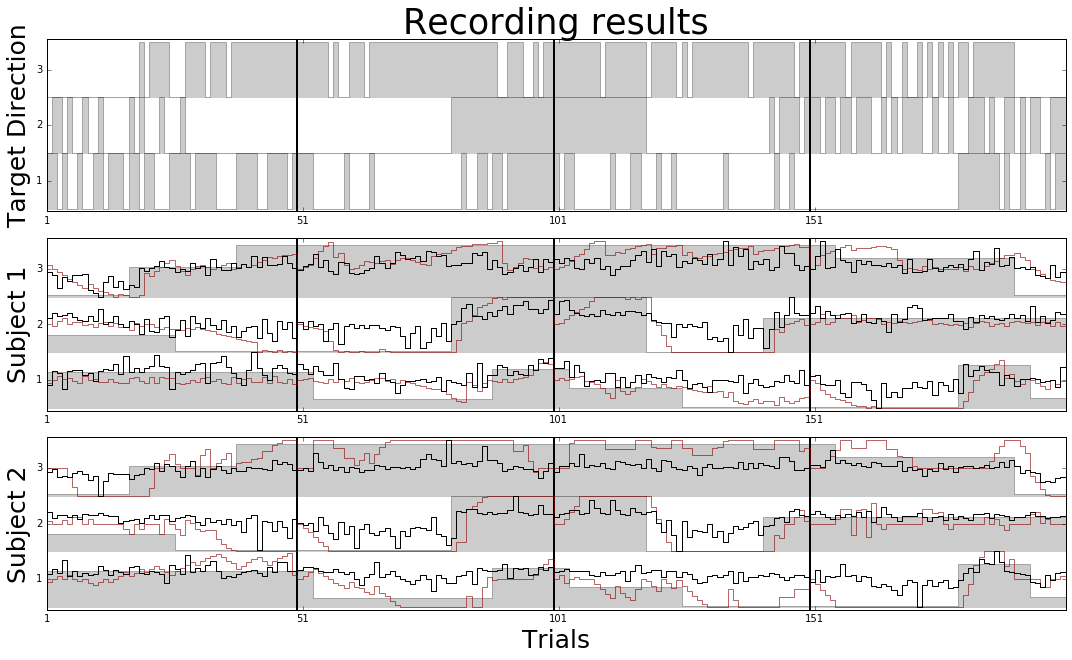

In [12]:
fig_width = 15
fig, axs = plt.subplots(3, 1, figsize=(fig_width, fig_width/(1.6180)))
        
        
liste=[0,3, 5]
#color = ['k', 'red','darkred']
#color_r = ['k', 'k','grey']
color = ['k', 'darkred','darkred']
color_r = ['k', 'k','k']
#c = ['rosybrown','darkred','red']
a = 0
for x in liste :
    print(EXP[x]['observer'], '=', color[a])
    N_trials = EXP[x]['N_trials']
    N_blocks = EXP[x]['N_blocks']
    p = EXP[x]['p']
    results = (EXP[x]['results']+1)/2 # results est sur [-1,1] on le ramene sur [0,1]
    v_anti = PARAM[x]['v_anti']

    stick = np.zeros_like(p)
    stick[:, :, 0] = np.ones((N_trials, 1)) * np.arange(N_blocks)[np.newaxis, :]
    stick[:, :, 1] = np.ones((N_trials, 1)) * np.arange(N_blocks)[np.newaxis, :]
    stick[:, :, 2] = np.ones((N_trials, 1)) * np.arange(N_blocks)[np.newaxis, :]

    axs[a].set_prop_cycle(cycler('color', [plt.cm.magma(h) for h in np.linspace(0, 1, N_blocks+1)]))
    if a==0 :
        _ = axs[a].step(range(N_trials), p[:, :, 0]+stick[:, :, 0], lw=1, c='k', alpha=.2)
    else :
        _ = axs[a].step(range(N_trials), p[:, :, 1]+stick[:, :, 1], lw=1, c='k', alpha=.2)    

    for i_block in range(N_blocks):
        if a==0 :
            _ = axs[a].fill_between(range(N_trials), i_block + np.zeros_like(p[:, i_block, 0]), i_block + p[:, i_block, 0], lw=.5, alpha=.2, facecolor='black', step='pre')
        else :
            _ = axs[a].fill_between(range(N_trials), i_block + np.zeros_like(p[:, i_block, 1]), i_block + p[:, i_block, 1], lw=.5, alpha=.2, facecolor='black', step='pre')
        #_ = axs[x].fill_between(range(N_trials), i_block + np.ones_like(p[:, i_block, 1]), i_block + p[:, i_block, 1], lw=.5, alpha=.1, facecolor='red', step='pre')
    axs[a].axis('tight')
    axs[a].set_yticks(np.arange(N_blocks)+.5)
    axs[a].set_yticklabels(np.arange(N_blocks)+1 )
    axs[a].bar(49, 3.1, bottom=-0.05, color='k', width=0, linewidth=2)
    axs[a].bar(99, 3.1, bottom=-0.05, color='k', width=0, linewidth=2)
    axs[a].bar(149, 3.1, bottom=-0.05, color='k', width=0, linewidth=2)

    for block in range(N_blocks):
        if a!=0:
            _ = axs[a].step(range(N_trials), block + results[:, block],  color=color[a], lw=1,alpha=0.6, label=EXP[x]['observer'])
            _ = axs[a].step(range(N_trials), block + ((np.array(v_anti[block])-np.min(v_anti[block]))/(np.max(v_anti[block])-np.min(v_anti[block]))),  color=color_r[a], lw=1,alpha=1, label=EXP[x]['observer'])

        #print('block', block+1, '=', sc.stats.pearsonr(p[:, block, 1], results[:,block]))
        #_ = axs[a].step(range(N_trials), block + ((((np.array(v_anti[block]))/15)+1)/2),  color=c[block], lw=1.2,alpha=1, label=EXP[x]['observer'])
    axs[a].set_xticklabels([1, 51, 101, 151])    
    fig.tight_layout()
    
    if a == 0 :
        axs[a].set_ylabel('Target Direction', fontsize=t_label)
    else :
        axs[a].set_ylabel('Subject %s'%(a), fontsize=t_label)
    
    
    axs[a].set_ylim(-.05, N_blocks + .05)

    #if a != len(liste)-1 : 
    #    axs[a].set_xticklabels([])

    axs[-1].set_xlabel('Trials', fontsize=t_label)
    axs[0].set_title('Recording results', fontsize=t_titre)
    
    a=a+1
plt.tight_layout() # pour supprimer les marge trop grande
#plt.subplots_adjust(hspace=0) # pour enlever espace entre les figures
plt.show()

In [13]:
def exponentiel (x, tau, maxi, start_anti, v_anti, latence, bino) :
    '''
    tau -- courbe
    maxi -- maximum
    latence -- tps où commence le mvt
    bino -- binomial
    
    start_anti = debut de l'anticipation
    v_anti =  vitesse de l'anticipation
    ''' 
    v_anti = v_anti/1000 # pour passer de sec à ms
    time = np.arange(len(x))
    vitesse = []
                
    for t in range(len(time)):
        
        if start_anti >= latence :
            if time[t] < latence :
                vitesse.append(0)
            else :
                vitesse.append((bino*2-1)*maxi*(1-np.exp(-1/tau*(time[t]-latence))))
        else :

            if time[t] < start_anti :
                vitesse.append(0)
            else :
                if time[t] < latence :
                    #vitesse.append((bino*2-1)*(time[t]-start_anti)*v_anti)
                    vitesse.append((time[t]-start_anti)*v_anti)
                    x = (time[t]-start_anti)*v_anti
                else :
                    vitesse.append((bino*2-1)*maxi*(1-np.exp(-1/tau*(time[t]-latence)))+x)
    return vitesse

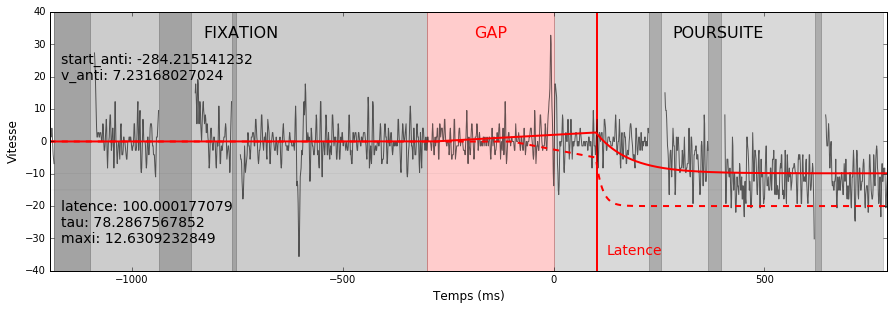

In [14]:
fig_width= 15
fig, axs = plt.subplots(1, 1, figsize=(fig_width, (fig_width/2)/1.6180))
block = 0
trial = 0


trial_data = trial + N_trials*block

data_x = data[trial_data]['x']
data_y = data[trial_data]['y']
trackertime = data[trial_data]['trackertime']

StimulusOn = data[trial_data]['events']['msg'][10][0]
StimulusOf = data[trial_data]['events']['msg'][14][0]
TargetOn = data[trial_data]['events']['msg'][15][0]
TargetOff = data[trial_data]['events']['msg'][16][0]
saccades = data[trial_data]['events']['Esac']
trackertime_0 = data[trial_data]['trackertime'][0]

gradient_x = np.gradient(data_x) # gradient en px/ms
gradient_deg = gradient_x * 1/exp['px_per_deg'] * 1000 # gradient en deg/sec

##################################################
# SUPPRESSION DES SACCADES
##################################################
gradient_deg_NAN = []
for x_data in range(len(data_x)):
    saccade = None
    for s in range(len(saccades)) :
        if x_data in np.arange((saccades[s][0]-trackertime_0), (saccades[s][1]-trackertime_0+10)) :
            gradient_deg_NAN.append(np.nan)#gradient_deg_NAN[x_data-1])#'nan')
            saccade = 'yes'
    if not saccade :
        gradient_deg_NAN.append(gradient_deg[x_data])
    saccade = None 
    
stop_latence = []    
for s in range(len(saccades)) :
    if (saccades[s][0]-trackertime_0) >= (TargetOn-trackertime_0+100) :
        stop_latence.append((saccades[s][0]-trackertime_0))
if stop_latence==[] :
    stop_latence.append(len(trackertime))
##################################################

start = TargetOn

StimulusOn_s = StimulusOn - start
StimulusOf_s = StimulusOf - start
TargetOn_s = TargetOn - start
TargetOff_s = TargetOff - start
trackertime_s = trackertime - start
        
# FIT
model = Model(exponentiel)
bino=p[trial, block, 0]
params = Parameters()

params.add('tau', value=15., min=13., max=80.)#, vary=False)
params.add('maxi', value=15., min=1., max=40.)#, vary=False)
params.add('latence', value=TargetOn-trackertime_0+100, min=TargetOn-trackertime_0+50, max=stop_latence[0])
params.add('start_anti', value=TargetOn-trackertime_0-100, min=StimulusOf-trackertime_0, max=TargetOn-trackertime_0-50)
params.add('v_anti', value=-25, min=-40., max=40.)
params.add('bino', value=bino, min=0, max=1, vary=False)

#result_deg = model.fit(new_gradient_deg, params, x=new_time)
result_deg = model.fit(gradient_deg_NAN, params, x=trackertime, fit_kws={'nan_policy': 'omit'})

debut  = TargetOn - trackertime_0 # TargetOn - temps_0


axs.axis([StimulusOn_s-10, TargetOff_s+10, -40, 40])


axs.plot(trackertime_s, gradient_deg_NAN, color='k', alpha=0.6)
axs.plot(trackertime_s, result_deg.init_fit, 'r--', linewidth=2)
axs.plot(trackertime_s, result_deg.best_fit, color='r', linewidth=2)
axs.plot(trackertime_s, np.ones(np.shape(trackertime_s)[0])*(bino*2-1)*15, color='k', linewidth=0.2, alpha=0.2)
axs.plot(trackertime_s, np.ones(np.shape(trackertime_s)[0])*(bino*2-1)*10, color='k', linewidth=0.2, alpha=0.2)


axs.axvspan(StimulusOn_s, StimulusOf_s, color='k', alpha=0.2)
axs.axvspan(StimulusOf_s, TargetOn_s, color='r', alpha=0.2)
axs.axvspan(TargetOn_s, TargetOff_s, color='k', alpha=0.15)
for s in range(len(saccades)) :
    axs.axvspan(saccades[s][0]-start, saccades[s][1]-start, color='k', alpha=0.2)
    
start_anti = result_deg.values['start_anti']-debut
v_anti = result_deg.values['v_anti']
latence = result_deg.values['latence']-debut
tau = result_deg.values['tau']
maxi = result_deg.values['maxi']


axs.bar(latence, 80, bottom=-40, color='r', width=6, linewidth=0)

       
axs.text(StimulusOn_s+(StimulusOf_s-StimulusOn_s)/2, 31, "FIXATION", color='k', fontsize=16, ha='center', va='bottom')
axs.text(StimulusOf_s+(TargetOn_s-StimulusOf_s)/2, 31, "GAP", color='r', fontsize=16, ha='center', va='bottom')
axs.text(TargetOn_s+(TargetOff_s-TargetOn_s)/2, 31, "POURSUITE", color='k', fontsize=16, ha='center', va='bottom')
axs.text(latence+25, -35, "Latence", color='r', fontsize=14)#,  weight='bold')
axs.text(StimulusOn_s+15, 18, "start_anti: %s \nv_anti: %s"%(start_anti, v_anti), color='k', fontsize=14, va='bottom')
axs.text(StimulusOn_s+15, -18, "latence: %s \ntau: %s \nmaxi: %s"%(latence, tau, maxi), color='k', fontsize=14, va='top')

axs.set_xlabel('Temps (ms)', fontsize=12)
axs.set_ylabel('Vitesse', fontsize=12)
plt.show()

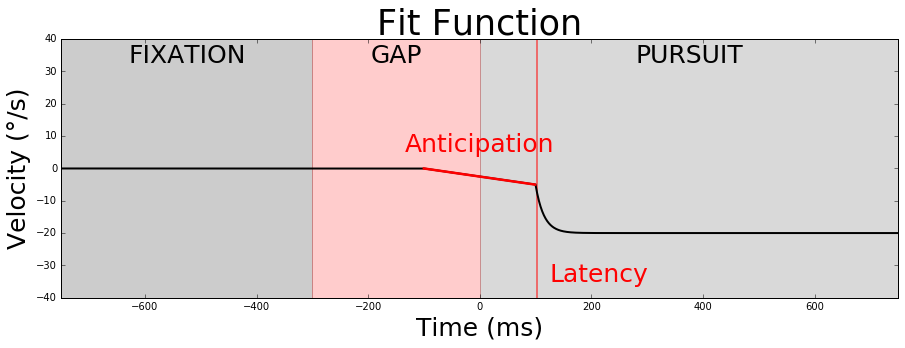

In [15]:
fig_width= 15
fig, axs = plt.subplots(1, 1, figsize=(fig_width, (fig_width/2)/1.6180))

#axs.axis([StimulusOn_s-10, TargetOff_s+10, -40, 40])
axs.axis([-750, 750, -40, 40])
axs.plot(trackertime_s, result_deg.init_fit, 'k', linewidth=2)
axs.axvspan(StimulusOn_s, StimulusOf_s, color='k', alpha=0.2)
axs.axvspan(StimulusOf_s, TargetOn_s, color='r', alpha=0.2)
axs.axvspan(TargetOn_s, TargetOff_s, color='k', alpha=0.15)
axs.bar(TargetOn_s+100, 80, bottom=-40, color='r', width=4, linewidth=0, alpha=0.5)
#axs.bar(TargetOn_s+100, 20, bottom=-15, color='k', width=4, linewidth=0)
#axs.bar(TargetOn_s-100, 20, bottom=-10, color='k', width=4, linewidth=0)

axs.plot(trackertime_s[TargetOn-trackertime_0-100:TargetOn-trackertime_0+100], result_deg.init_fit[TargetOn-trackertime_0-100:TargetOn-trackertime_0+100], c='r', linewidth=2.5)


axs.text(StimulusOf_s+(TargetOn_s-StimulusOf_s)/2, 31, "GAP", color='k', fontsize=t_label, ha='center', va='bottom')
axs.text((StimulusOf_s-750)/2, 31, "FIXATION", color='k', fontsize=t_label, ha='center', va='bottom')
axs.text((750-TargetOn_s)/2, 31, "PURSUIT", color='k', fontsize=t_label, ha='center', va='bottom')

'''
axs.text(StimulusOn_s+(StimulusOf_s-StimulusOn_s)/2, 31, "FIXATION", color='k', fontsize=18, ha='center', va='bottom')
axs.text(TargetOn_s+(TargetOff_s-TargetOn_s)/2, 31, "POURSUITE", color='k', fontsize=18, ha='center', va='bottom')
'''
axs.text(TargetOn_s+100+25, -35, "Latency", color='r', fontsize=t_label)#,  weight='bold')
axs.text(TargetOn_s, 5, "Anticipation", color='r', fontsize=t_label, ha='center')#,  weight='bold')

axs.set_xlabel('Time (ms)', fontsize=t_label)
axs.set_ylabel('Velocity (°/s)', fontsize=t_label)
axs.set_title('Fit Function', fontsize=t_titre)

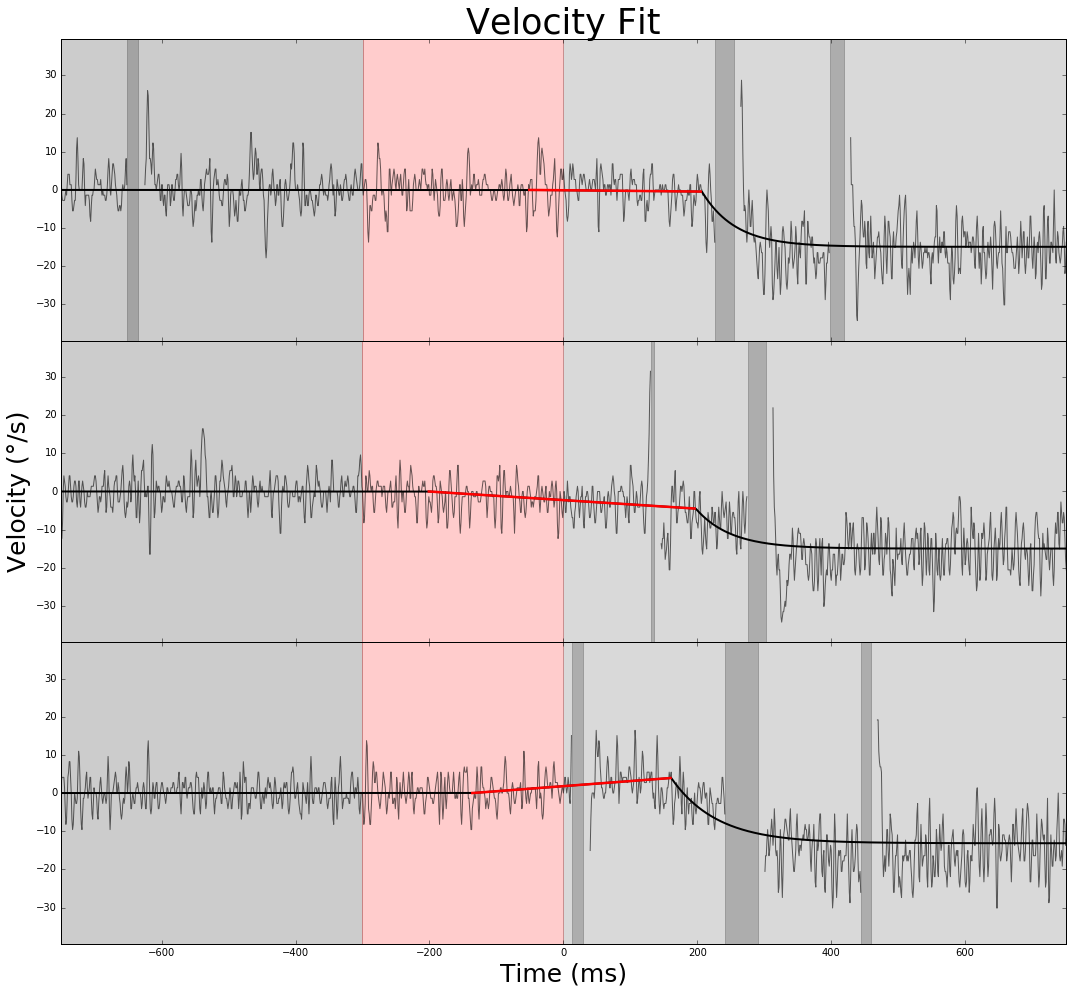

In [16]:
liste_start_anti = []
liste_liste_v_anti = []
liste_latence = []
liste_tau = []
liste_maxi = []

block = 0
#liste = [19,71,115,146,27,83]
liste = [19,71,83]

fig_width= 15
fig, axs = plt.subplots(len(liste), 1, figsize=(fig_width, (fig_width*(len(liste)/2)/1.6180)))

x = 0
for trial in liste :

    trial_data = trial + N_trials*block
    data_x = data[trial_data]['x']
    data_y = data[trial_data]['y']
    trackertime = data[trial_data]['trackertime']

    StimulusOn = data[trial_data]['events']['msg'][10][0]
    StimulusOf = data[trial_data]['events']['msg'][14][0]
    TargetOn = data[trial_data]['events']['msg'][15][0]
    TargetOff = data[trial_data]['events']['msg'][16][0]
    saccades = data[trial_data]['events']['Esac']

    trackertime_0 = data[trial_data]['trackertime'][0]

    gradient_x = np.gradient(data_x)
    gradient_deg = gradient_x * 1/exp['px_per_deg'] * 1000 # gradient en deg/sec

    ##################################################
    # SUPPRESSION DES SACCADES
    ##################################################
    gradient_deg_NAN = []
    for x_data in range(len(data_x)):
        saccade = None
        for s in range(len(saccades)) :
            if x_data in np.arange((saccades[s][0]-trackertime_0), (saccades[s][1]-trackertime_0+10)) :
                gradient_deg_NAN.append(np.nan)
                saccade = 'yes'
        if not saccade :
            gradient_deg_NAN.append(gradient_deg[x_data])
        saccade = None        
    ##################################################

    start = TargetOn

    StimulusOn_s = StimulusOn - start
    StimulusOf_s = StimulusOf - start
    TargetOn_s = TargetOn - start
    TargetOff_s = TargetOff - start
    trackertime_s = trackertime - start

    ##################################################
    # FIT
    ##################################################
    model = Model(exponentiel)
    bino=p[trial, block, 0]
    params = Parameters()
    params.add('tau', value=15., min=13., max=70.)#, vary=False)
    params.add('maxi', value=15., min=10., max=40.)#, vary=False)
    params.add('latence', value=TargetOn-trackertime_0+100, min=TargetOn-trackertime_0+50, max=len(trackertime))
    params.add('start_anti', value=TargetOn-trackertime_0-100, min=StimulusOf-trackertime_0+100, max=TargetOn-trackertime_0-50)
    params.add('v_anti', value=0., min=-100., max=100.)
    params.add('bino', value=bino, min=0, max=1, vary=False)

    result_deg = model.fit(gradient_deg_NAN, params, x=trackertime, fit_kws={'nan_policy': 'omit'})
    ##################################################

    #axs[x].axis([StimulusOn_s-10, TargetOff_s+10, -40, 40])
    axs[x].axis([-750, 750, -39.5, 39.5])

    axs[x].plot(trackertime_s, gradient_deg_NAN, color='k', alpha=0.6)
    axs[x].plot(trackertime_s, result_deg.best_fit, color='k', linewidth=2)

    axs[x].axvspan(StimulusOn_s, StimulusOf_s, color='k', alpha=0.2)
    axs[x].axvspan(StimulusOf_s, TargetOn_s, color='r', alpha=0.2)
    axs[x].axvspan(TargetOn_s, TargetOff_s, color='k', alpha=0.15)
    for s in range(len(saccades)) :
        axs[x].axvspan(saccades[s][0]-start, saccades[s][1]-start, color='k', alpha=0.2)


    debut  = TargetOn - trackertime_0 # TargetOn - temps_0

    start_anti = result_deg.values['start_anti']
    v_anti = result_deg.values['v_anti']
    latence = result_deg.values['latence']
    tau = result_deg.values['tau']
    maxi = result_deg.values['maxi']

    axs[x].bar(latence, 80, bottom=-40, color='r', width=6, linewidth=0)
    axs[x].plot(trackertime_s[int(start_anti):int(latence)], result_deg.best_fit[int(start_anti):int(latence)], c='r', linewidth=2.5)

    #axs[x].set_ylabel(trial, fontsize=9)
    axs[x].set_xlabel('Time (ms)', fontsize=t_label)
    if x == int((len(liste)-1)/2) :
        axs[x].set_ylabel('Velocity (°/s)', fontsize=t_label)
    if x!= (len(liste)-1) : 
        axs[x].set_xticklabels([])
    if x==0 :
        axs[x].set_title('Velocity Fit', fontsize=t_titre)

    x=x+1
plt.tight_layout() # pour supprimer les marge trop grande
plt.subplots_adjust(hspace=0) # pour enlever espace entre les figures